# Here We will learn to use transfer learning on cat vs dog classifcation

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d salader/dogs-vs-cats


Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
100% 1.06G/1.06G [00:59<00:00, 18.9MB/s]
100% 1.06G/1.06G [00:59<00:00, 19.1MB/s]


In [ ]:
#Unzipping
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip','r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten,Dense
from keras.applications.vgg16 import VGG16

In [ ]:
#Make an object of VGG16 class
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [ ]:
conv_base.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 150, 150, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 150, 150, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 75, 75, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 75, 75, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 75, 75, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 37, 37, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 37, 37, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 37, 37, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 18, 18, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 18, 18, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 18, 18, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 9, 9, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 9, 9, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

**Clearly You can see that the last Fully connected layers are not there**

In [ ]:
#Making of the model
model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(units=256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       2,097,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,812,353 (64.13 MB)

 Trainable params: 2,097,665 (8.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
conv_base.trainable = False;

In [ ]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size = 32,
    image_size=(150,150),
    validation_split = 0.2,
    subset='training',
    seed=123
)

validation_dataset = tf.keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode='int',
    batch_size = 32,
    image_size=(150,150),
    validation_split = 0.2,
    subset='validation',
    seed=123
)

Found 20000 files belonging to 2 classes.
Using 16000 files for training.
Found 20000 files belonging to 2 classes.
Using 4000 files for validation.


In [ ]:
def process(image,label):
    image = tf.cast(image/255,tf.float32)
    return image,label

train_dataset = train_dataset.map(process)
validation_dataset = validation_dataset.map(process)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_dataset,epochs=10,validation_data=validation_dataset)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 81s 141ms/step - accuracy: 0.8416 - loss: 0.4093 - val_accuracy: 0.9082 - val_loss: 0.2174
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 66s 127ms/step - accuracy: 0.9187 - loss: 0.2052 - val_accuracy: 0.9093 - val_loss: 0.2176
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 126ms/step - accuracy: 0.9358 - loss: 0.1656 - val_accuracy: 0.9043 - val_loss: 0.2394
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 63s 125ms/step - accuracy: 0.9389 - loss: 0.1531 - val_accuracy: 0.9107 - val_loss: 0.2269
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 91s 143ms/step - accuracy: 0.9526 - loss: 0.1214 - val_accuracy: 0.9045 - val_loss: 0.2521
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 74s 126ms/step - accuracy: 0.9605 - loss: 0.1021 - val_accuracy: 0.9010 - val_loss: 0.2753
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 82s 126ms/step - accuracy: 0.9705 - loss: 0.0775 - val_accuracy: 0.9070 - val_loss: 0.3013
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 71s 142ms/step - accuracy: 0.9773 - loss: 0

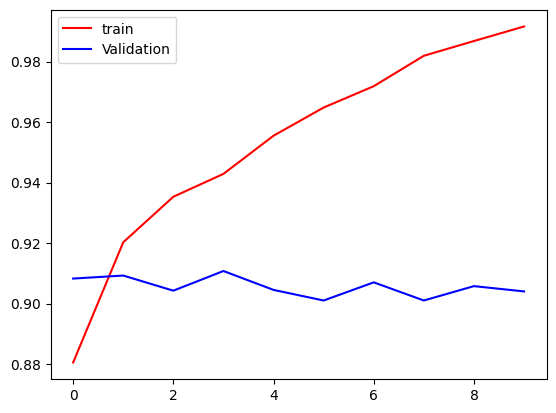

In [ ]:
#plot of accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='Validation')
plt.legend()
plt.show()

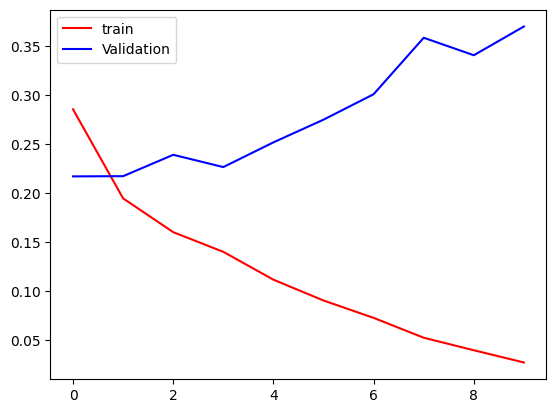

In [ ]:
#plot of loss
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='Validation')
plt.legend()
plt.show()

In [ ]:
test_dataset = tf.keras.utils.image_dataset_from_directory(
    directory='/content/test',
    labels='inferred',
    label_mode='int',
    batch_size=32,
    image_size=(150, 150)
)

Found 5000 files belonging to 2 classes.


In [ ]:
model.evaluate(test_dataset)

157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 119ms/step - accuracy: 0.8426 - loss: 46.5467


[43.786739349365234, 0.8460000157356262]

**We can see that the loss is too high,So in next notebook wewill use data augmentation to reduce the overfitting**